In [ ]:
%pip install numpy pandas matplotlib seaborn scikit-learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

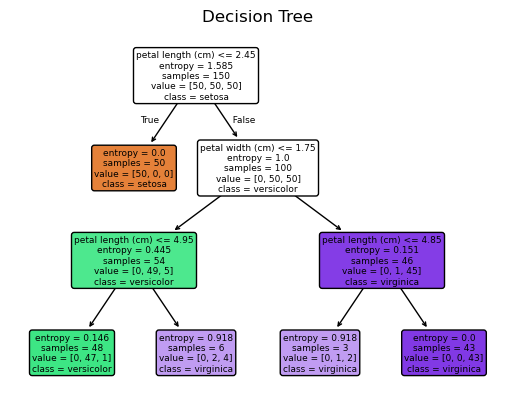

In [8]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
dt.fit(iris.data, iris.target)
plot_tree(dt, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title("Decision Tree")
plt.show()

In [9]:
y_pred = dt.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy model : {accuracy}")

Accuracy model : 1.0


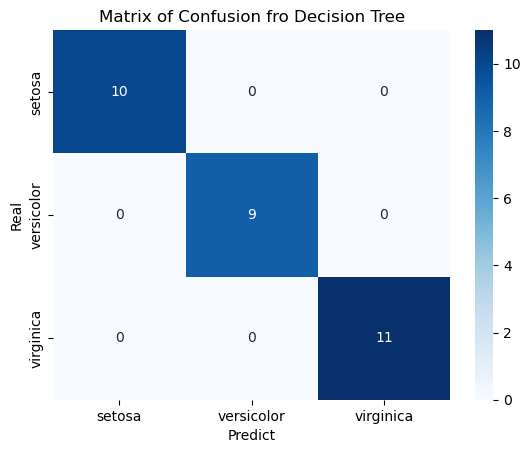

In [11]:
confus_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confus_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predict")
plt.ylabel("Real")
plt.title("Matrix of Confusion fro Decision Tree")
plt.show()

In [12]:
feature_importance = pd.DataFrame({'Feature': iris.feature_names, 'Importance': dt.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\n Feature Importance (Information Gain):")
print(feature_importance)


 Feature Importance (Information Gain):
             Feature  Importance
2  petal length (cm)     0.68977
3   petal width (cm)     0.31023
1   sepal width (cm)     0.00000
0  sepal length (cm)     0.00000


# Decision Trees & Information Gain
## How to choose features in Decision Trees?

- Select the feature that maximizes the purity of the child nodes.
  1.**Common criteria**: Information Gain (IG) and Gini Impurity.
  2. **IG** = Entropy before split - Weighted Entropy after split.
  3. Relationship between Entropy and Information Gain:

- **Increase Information Gain** → Decrease Entropy (more order in the node).
- If IG = 0.3, it means that the entropy has decreased by 0.3 after the split.